<a href="https://colab.research.google.com/github/tcsanitesh/DataScience/blob/main/CaseStudy3_IMLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Domain –Retail/Fashion
###focus –Optimize sales
###Business challenge/requirement

Fyntra is the largest online clothing company in USA. It sells clothing online,but they also have in-store style and clothing advice sessions. Customers come into the store, have sessions/meetings with a personal stylist, then can go home and order either on a mobile app or website for the clothes they want.
Company wants to decidewhether to focus the effort on mobile app experience or its website. As a drastic measure it is also evaluating to shut down the website.
You as a ML expert in the team will help the company make the right decision
###Key issues
Clearly establish a correlation among the parameters supplied in data
####ConsiderationsNONE
####Data volumeApprox 500 records –file FyntraCustomerData.csv (All data is fake so do not worry about privacy)

###Additional information-NA

###Business benefits
Increase in profits as thefocus on the optimal sales channel will result into the higher top line and thehigher bottom line

1.Compute --Use seaborn to create a jointplot to compare the Time on Website and Yearly Amount Spent columns.  Is there a correlation?
2.Compute –Do the same as above but now with Time on App and Yearly Amount Spent. Is this correlation stronger than 1stOne?
3.Compute --Explore types of relationships across the entire data set using pairplot . Based off this plot what looks to be the most correlated feature with Yearly Amount Spent?
4.Compute –Create linear model plot of Length of Membership and Yearly Amount Spent. Does the data fits well in linear plot?
5.Compute –Train and Test the data and answer multiple questions --What is the use of random_state=85?
6.Compute –Predict the data and do a scatter plot. Check if actual and predicted data match?7.What is the value of Root Mean Squared Error?

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("https://raw.githubusercontent.com/tcsanitesh/DATA/main/FyntraCustomerData.csv")
df


,Email,Address,Avatar,Avg_Session_Length,Time_on_App,Time_on_Website,Length_of_Membership,Yearly_Amount_Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092
...,...,...,...,...,...,...,...,...
495,lewisjessica@craig-evans.com,"4483 Jones Motorway Suite 872\nLake Jamiefurt,...",Tan,33.237660,13.566160,36.417985,3.746573,573.847438
496,katrina56@gmail.com,"172 Owen Divide Suite 497\nWest Richard, CA 19320",PaleVioletRed,34.702529,11.695736,37.190268,3.576526,529.049004
497,dale88@hotmail.com,"0787 Andrews Ranch Apt. 633\nSouth Chadburgh, ...",Cornsilk,32.646777,11.499409,38.332576,4.958264,551.620146
498,cwilson@hotmail.com,"680 Jennifer Lodge Apt. 808\nBrendachester, TX...",Teal,33.322501,12.391423,36.840086,2.336485,456.469510


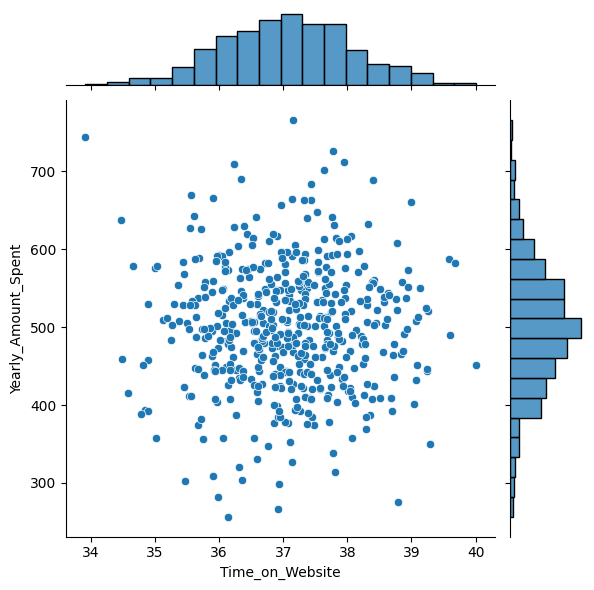

In [3]:
sns.jointplot(data=df, x="Time_on_Website", y="Yearly_Amount_Spent", kind = "scatter")
plt.show()

### There is no clear correlation between the two field as they are scaatered all over the graph

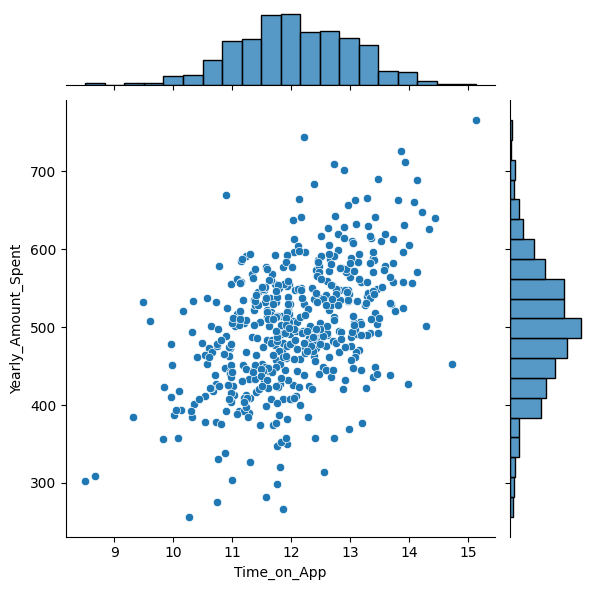

In [4]:
sns.jointplot(data=df, x="Time_on_App", y="Yearly_Amount_Spent", kind = "scatter")
plt.show()

### There is  correlation between the two field as they seems to be progressive and all within a range of streight line, although its scattered in more area.so can't say good correlation.

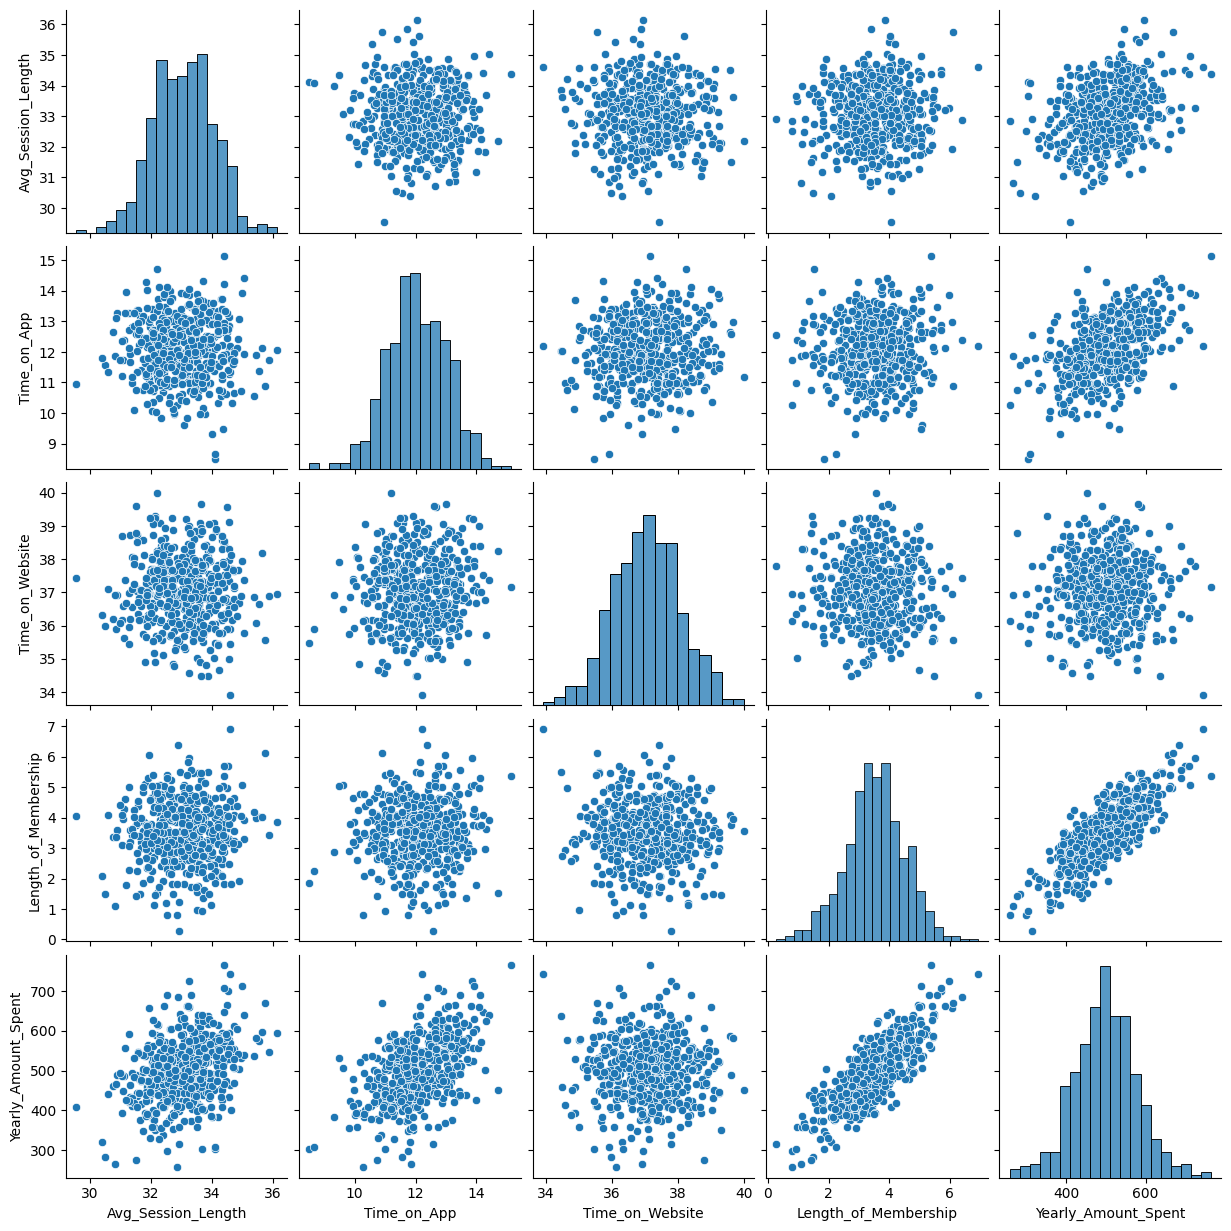

In [5]:
sns.pairplot(df)

###Most correlated data seems to be Length_of_Membership

##4.Compute –Create linear model plot of Length of Membership and Yearly Amount Spent. Does the data fits well in linear plot?

In [7]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(df[['Length_of_Membership']],df['Yearly_Amount_Spent'])

LinearRegression()

<Axes: xlabel='Length_of_Membership', ylabel='Yearly_Amount_Spent'>

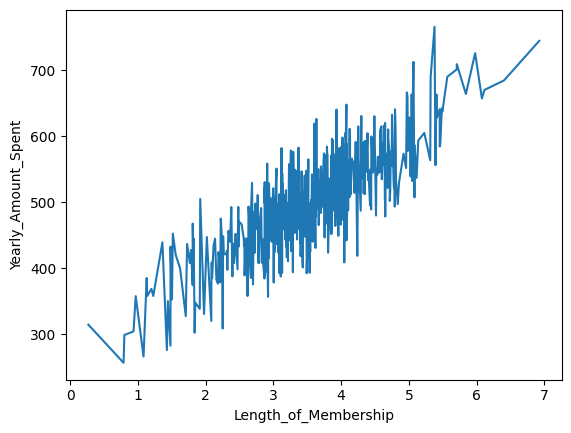

In [9]:
sns.lineplot(data=df,x="Length_of_Membership",y="Yearly_Amount_Spent")

No, the data in the graph does not fit a linear model because it would not accurately represent the relationship between the two variables.

## 5.Compute –Train and Test the data and answer multiple questions --What is the use of random_state=85?

In [16]:
from sklearn.model_selection import train_test_split

X =df.iloc[:,3:7]
y = df["Yearly_Amount_Spent"]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=85)




In [25]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 350 entries, 92 to 362
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Avg_Session_Length    350 non-null    float64
 1   Time_on_App           350 non-null    float64
 2   Time_on_Website       350 non-null    float64
 3   Length_of_Membership  350 non-null    float64
dtypes: float64(4)
memory usage: 13.7 KB


In [27]:
y_train.count()

350

In [28]:
X_test.count()

Avg_Session_Length      150
Time_on_App             150
Time_on_Website         150
Length_of_Membership    150
dtype: int64

##6.Compute –Predict the data and do a scatter plot. Check if actual and predicted data match?

In [29]:
lm.fit(X_train,y_train)

LinearRegression()

In [31]:
y_pred =lm.predict(X_test)

Text(0, 0.5, 'Predicted')

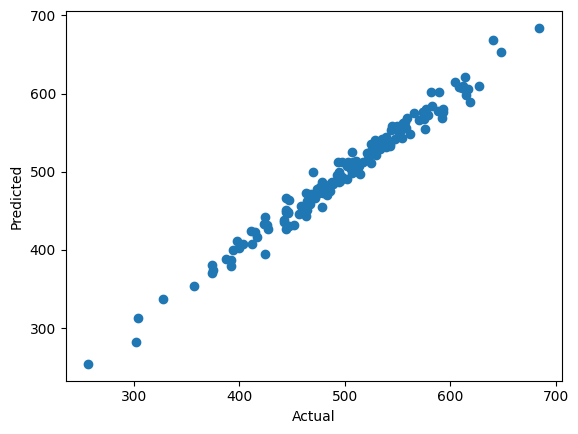

In [34]:
plt.scatter(y_test,y_pred)
plt.xlabel("Actual")
plt.ylabel("Predicted")

##7.What is the value of Root Mean Squared Error?


In [35]:
from sklearn.metrics import mean_squared_error
import numpy as np
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error:", rmse)

Root Mean Squared Error: 10.572658672879333
